In [2]:
import torch
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def PCA(data, k=3):
    X = data
    X_mean = torch.mean(X,0)
    X = X - X_mean.expand_as(X)
    U,S,V = torch.svd(torch.t(X))
    return torch.mm(X,U[:,:k])

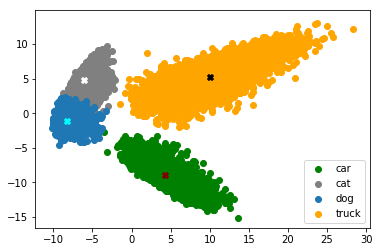

In [4]:
S = torch.load('../Hierarchical_Clustering/clusters2.pth')

l = [1,3,5,9]
lens = [4998, 4967, 4981, 4997]
output = torch.load("output.pth")


plt.scatter(output[:,0][:lens[0]], output[:,1][:lens[0]], color = 'green', label = 'car')
plt.scatter(output[:,0][lens[0]:lens[0]+lens[1]], output[:,1][lens[0]:lens[0]+lens[1]], color = 'gray', label = 'cat')
plt.scatter(output[:,0][lens[0]+lens[1]:lens[0]+lens[1]+lens[2]], output[:,1][lens[0]+lens[1]:lens[0]+lens[1]+lens[2]], label = 'dog')
plt.scatter(output[:,0][lens[0]+lens[1]+lens[2]:lens[0]+lens[1]+lens[2]+lens[3]], output[:,1][lens[0]+lens[1]+lens[2]:lens[0]+lens[1]+lens[2]+lens[3]], color = 'orange', label = 'truck')
plt.scatter(output[:,0][-4], output[:,1][-4], marker = 'X',color = 'maroon')
plt.scatter(output[:,0][-3], output[:,1][-3], marker = 'X',color = 'white')
plt.scatter(output[:,0][-2], output[:,1][-2], marker = 'X',color = 'cyan')
plt.scatter(output[:,0][-1], output[:,1][-1], marker = 'X',color = 'black')
    
plt.legend(loc=4)    
plt.show()